In [1]:
#Import required Libaries and functions
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dry-beans-dataset/Dry_Bean_Dataset.csv


In [2]:
# reading in Data and setting Constants
SOURCE = "../input/dry-beans-dataset/Dry_Bean_Dataset.csv"
CLASSES = np.array(["SEKER","BARBUNYA","BOMBAY","CALI","DERMASON","HOROZ","SIRA"])
data = pd.read_csv(SOURCE)
onlydata=data.loc[:,'Area':'ShapeFactor4']
onlydata.describe(include='all')

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,1.361100e+04,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,7.729110e+05,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,3.238848e+05,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,5.536000e+02,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,6.769955e+05,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,7.722730e+05,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,9.555000e+05,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1.921685e+06,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


kt kiểu dữ liệu

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

data cleaning

kiểm tra phần tử có NaN hay k?

In [4]:
data.isna 

<bound method DataFrame.isna of         Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395  610291.00       208.178117       173.888747      1.197191   
1      28734  638018.00       200.524796       182.734419      1.097356   
2      29380     624.11       212.826130       175.931143      1.209713   
3      30008  645884.00       210.557999       182.516516      1.153638   
4      30140  620134.00       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097  759696.00       288.721612       185.944705      1.552728   
13607  42101  757499.00       281.576392       190.713136      1.476439   
13608  42139  759321.00       281.539928       191.187979      1.472582   
13609  42147  763779.00       283.382636       190.275731      1.489326   
13610  42159  772237.00       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity 

tất cả các giá trị được thay thế bằng một giá trị Boolean Đúng cho các giá trị NULL, và nếu không thì là Sai.

In [5]:
data.isnull()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13607,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data['Solidity']=data['Solidity'].replace(np.NaN,data['Solidity'].mean())

In [7]:
data['roundness']=data['roundness'].replace(np.NaN,data['roundness'].mean())

In [8]:
data['Compactness']=data['Compactness'].replace(np.NaN,data['Compactness'].mean())

In [9]:
data['ShapeFactor1']=data['ShapeFactor1'].replace(np.NaN,data['ShapeFactor1'].mean())

In [10]:
data['ShapeFactor2']=data['ShapeFactor2'].replace(np.NaN,data['ShapeFactor2'].mean())

In [11]:
data['ShapeFactor3']=data['ShapeFactor3'].replace(np.NaN,data['ShapeFactor3'].mean())

In [12]:
data['ShapeFactor4']=data['ShapeFactor4'].replace(np.NaN,data['ShapeFactor4'].mean())

## Part 1: Data Exploration Aims
- Display first 5 lines of Data
- Display scatterplot and their correlation between 6 variables taken from the dataset
- Display number of instances for each Bean class

In [13]:
#Display first 5 lines of the Dataset
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610291.00,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638018.00,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.11,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645884.00,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620134.00,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


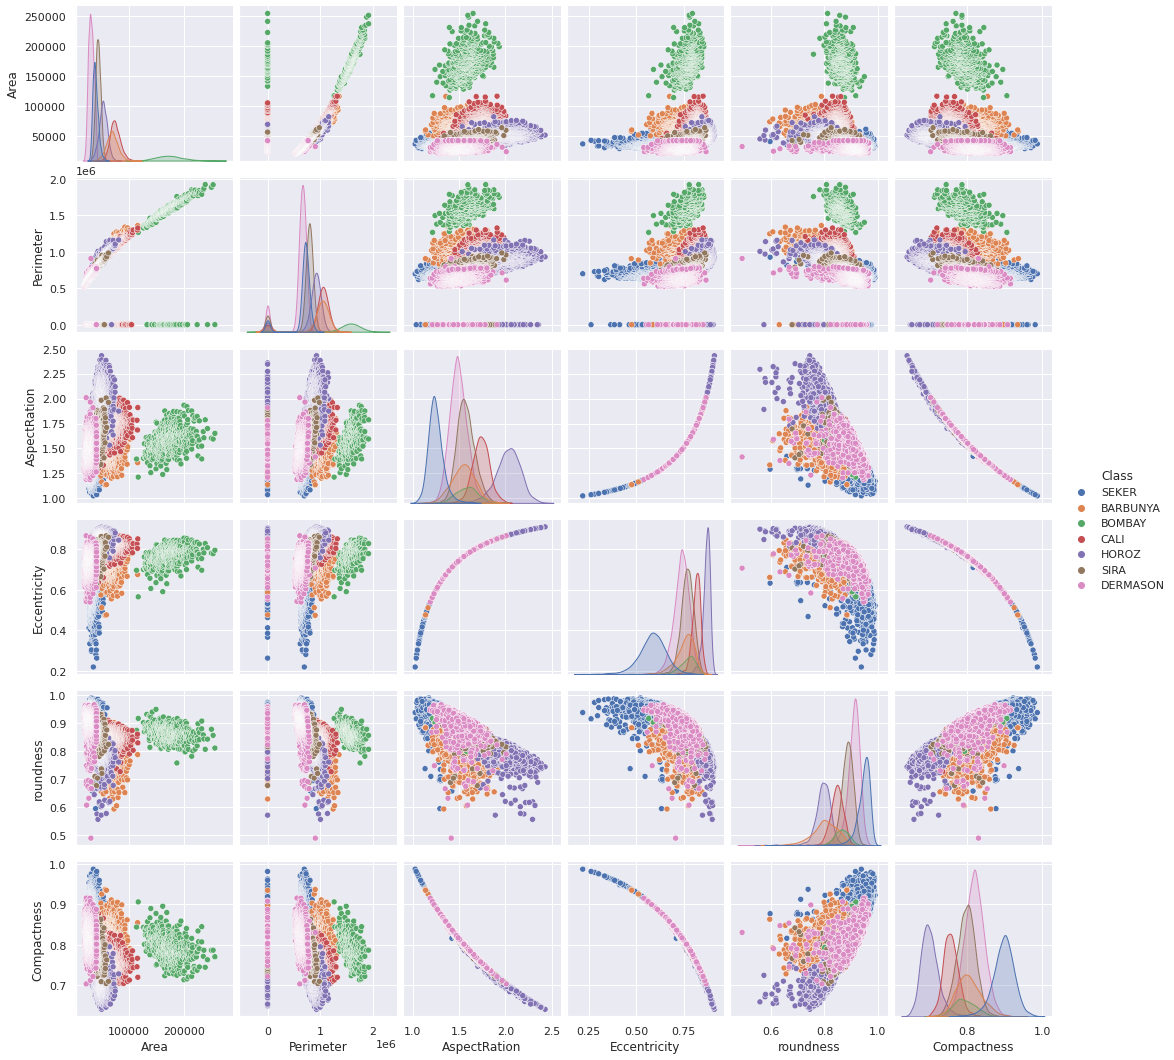

In [14]:
#Visualisation for 6 variable Scatterplot including Class labels
data6 = data[["Area","Perimeter","AspectRation","Eccentricity","roundness","Compactness","Class"]]
data6.head()
sns.set_theme(style="darkgrid")
sns.pairplot(data6, hue="Class")

In [15]:
#Using the correlation matrix to aid my descriptions in accordance with the scatterplot matrix
data6.corr()

,Area,Perimeter,AspectRation,Eccentricity,roundness,Compactness
Area,1.000000,0.577670,0.241735,0.267481,-0.357530,-0.268067
Perimeter,0.577670,1.000000,0.222459,0.224536,-0.318802,-0.234670
AspectRation,0.241735,0.222459,1.000000,0.924293,-0.766979,-0.987687
Eccentricity,0.267481,0.224536,0.924293,1.000000,-0.722272,-0.970313
roundness,-0.357530,-0.318802,-0.766979,-0.722272,1.000000,0.768086
Compactness,-0.268067,-0.234670,-0.987687,-0.970313,0.768086,1.000000


#### Describing the Scatterplot Matrix
Looking at these scatterplots, we can assert that there are clear clusters forming within some scatterplots, namely between the area and perimeter attributes with all other attributes (but not with themselves). We can assume that these clusters are filled with beans with similar attributes and may be more likely to be classified within a particular class. 
It is also clear that there is a clear relationship between area and perimeter, suggesting they are proportionate with a high correlation coefficient, being 0.967. 

Assessing variables "Compactness" with "Aspect Ration" and "Eccentricity", each relationship shows a clear inversely proportionate relationship. The "Compactness" attribute has a -0.988 correlation coefficient with "Aspect Ration", showing a slight concave out curve. Similarly, the "Compactness" attribute has a -0.970 correlation coefficient with "Eccentricity", showing a slight concave in curve in the scatter matrix. 

It is also worth noting that for the relationship between the "Roundness" attribute and the "Aspect Ration, "Ecccentricity" and "Compactness" is unique in the sense that there seems to be an upperbound between these scatter plots. They have a defined upperbound where there are no outliers which go beyond the upper bound (at least in this study). This suggests that for a bean of a given "Aspect Ration", "Eccentricity" or "Compactness" value, there will be a maximum roundess.  Outliers for low values of roundess do exist. There seems to be some moderate correlation between roundness and these attributes:
- Aspect Ration: -0.767
- Eccentricity: -0.722
- Compactness: 0.768

In [16]:
# Finding instances of each class
def findInstances(beans,classes):
    instanceCount = dict()
    for beanClass in CLASSES:
        numinstances = beans.Class.value_counts()[beanClass]
        instanceCount[beanClass] = numinstances
        print(f"There are {numinstances} instances for class: {beanClass}")

    minInstance = min(instanceCount, key=instanceCount.get)

    print(f"\nThe class of beans with the least amount of instances is: {minInstance}")
    
    
findInstances(data,CLASSES)

There are 2027 instances for class: SEKER
There are 1322 instances for class: BARBUNYA
There are 522 instances for class: BOMBAY
There are 1630 instances for class: CALI
There are 3546 instances for class: DERMASON
There are 1928 instances for class: HOROZ
There are 2636 instances for class: SIRA

The class of beans with the least amount of instances is: BOMBAY


 Part 2: Preprocessing Data for Training 
- Applying Train-Test-Split to form 80%-20% split of data
- Applying StandardScaler feature scaling to standardise data

In [17]:
# Using train_test_split 
dataAttributes = data.drop("Class",axis=1)
dataClasses = data[["Class"]]

# setting random_state to 0 for reproducable results
x_train, x_test, y_train, y_test = train_test_split(dataAttributes,dataClasses, test_size = 0.2, train_size=0.8, random_state=0)

print(f"The number of instances in the training set: {len(x_train)}")
print(f"The number of instances in the testing set: {len(x_test)}")

The number of instances in the training set: 10888
The number of instances in the testing set: 2723


In [18]:
# Implementing StandardScaler feature scaling
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

## Training Models
- Train a model using Support Vector Machine Classifier
- Train a model using Stochastic Gradient Descent Classifier

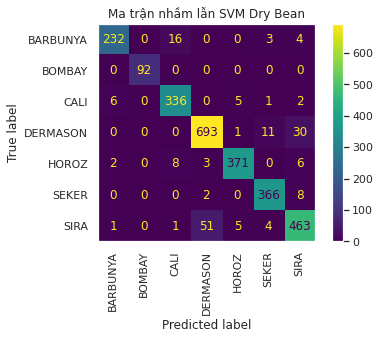

In [19]:
# Support Vector Machine Classifier 
svmClf = svm.SVC(gamma=0.14, C=13, random_state = 0)
svmClf.fit(x_train,np.ravel(y_train))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(svmClf, x_test, y_test)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Ma trận nhầm lẫn SVM Dry Bean')
plt.show()  

In [20]:
# Building classification report for the results from the SVM classifier
predictedSVM = svmClf.predict(x_test)
reportSVM = classification_report(y_test, predictedSVM, output_dict=True)
reportdfSVM = pd.DataFrame(reportSVM).transpose()
reportdfSVM

,precision,recall,f1-score,support
BARBUNYA,0.962656,0.909804,0.935484,255.000000
BOMBAY,1.000000,1.000000,1.000000,92.000000
CALI,0.930748,0.960000,0.945148,350.000000
DERMASON,0.925234,0.942857,0.933962,735.000000
HOROZ,0.971204,0.951282,0.961140,390.000000
SEKER,0.950649,0.973404,0.961892,376.000000
SIRA,0.902534,0.881905,0.892100,525.000000
accuracy,0.937569,0.937569,0.937569,0.937569
macro avg,0.949004,0.945607,0.947104,2723.000000
weighted avg,0.937690,0.937569,0.937452,2723.000000


#### Choice of Hyperparameters for SVC
Two hyperparameters worth examining are gamma and C. The gamma hyperparameter defines the "learning step" of one training example. The C or regularisation hyperparameter defines the penalty for misclassified points and will controll the size of the margin or "street" in the SVM Classifier. Here, I choose to use gamma = 0.14 and C = 13. 
This moderate C value allows the SVM Classifier to tolerate some misclassifications and this relatively small gamma value allows the model to generate a large similarity radius, allowing more area for classification of a class of bean. 

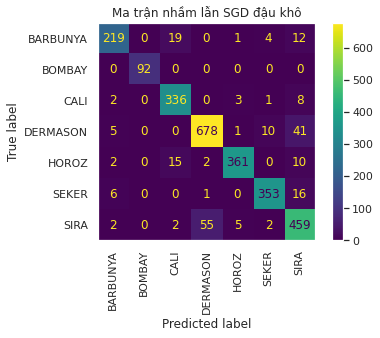

In [21]:
# Stochastic Gradient Descent Classifier
sgdClf = SGDClassifier(loss="hinge", penalty="l2", alpha =0.004, learning_rate = "optimal", random_state=0)
sgdClf.fit(x_train,np.ravel(y_train))

# SGD Classifier Confusion Matrix
plot_confusion_matrix(sgdClf, x_test, y_test)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Ma trận nhầm lẫn SGD đậu khô')
plt.show()  

In [22]:
# Building classification report for the results from the SGD classifier
predictedSGD = sgdClf.predict(x_test)
reportSGD = classification_report(y_test, predictedSGD, output_dict=True)
reportdfSGD = pd.DataFrame(reportSGD).transpose()
reportdfSGD

,precision,recall,f1-score,support
BARBUNYA,0.927966,0.858824,0.892057,255.000000
BOMBAY,1.000000,1.000000,1.000000,92.000000
CALI,0.903226,0.960000,0.930748,350.000000
DERMASON,0.921196,0.922449,0.921822,735.000000
HOROZ,0.973046,0.925641,0.948752,390.000000
SEKER,0.954054,0.938830,0.946381,376.000000
SIRA,0.840659,0.874286,0.857143,525.000000
accuracy,0.917371,0.917371,0.917371,0.917371
macro avg,0.931450,0.925718,0.928129,2723.000000
weighted avg,0.918618,0.917371,0.917601,2723.000000





## Results of Analysis
#### SVM Classifier Confusion Matrix Results 
From inspection of both confusion matrices, the diagonals had far larger results than the other sections. This suggests we have a large proportion of correctly classified classes for the beans. Some notable observations include how there are many more instances of the DERMASON class of beans and thus we should not be surprised that there are far more incorrect classifications of the DERMASON class. In particular, there were some DERMASON beans which have been incorrectly classified as SIRA beans with 35 incorrect classifications and likewise, 51 true SIRA beans have been incorrectly classified as DERMASON beans. From this errors, we may assume that these two beans may be more similar to each other compared to the other beans. 

#### SVM Classifier Classification Report Results
This combination of hyperparameters produced strong results for me with accuracy reaching 93.64%. Inspecting the f1-score (weighted result from both precision and recall) from the BOMBAY class (as well as inspecting the confusion matrix), you can see how this class has been perfectly classified from the SVM classifier with no misclassifications. On the other hand, the SIRA class was the most poorly classified class of beans with f1-score of 0.8844.


## Comparison between SVM Classifier Model vs SGD Classfier Model

#### SGD Classifier Confusion Matrix Results and Comparison
From inspection of the confusion matrix, overall, the results were very similar to the confusion matrix generated from the SVM classifier but comparitively, there seemed to be more misclassifications scattered around the confusion matrix. Again, the diagonals held the majority of correct classifications, meaning that the majority of predictions were the true class. Noteable observations in the SGD classifier observed numerous true DERMASON beans which have been incorrectly classified as SIRA beans with 37 incorrect classifications and likewise, 54 true SIRA beans have been incorrectly classified as DERMASON beans. These results were analogous to the results found in the SVM classifier.

#### SGD Classifier Classification Report Results and Comparison
Using the specified set of hyperametres, I achived an accuracy of 91.92%, which is slightly lower than the accuracy from the SVM classifier. Although close, the SVM classifer was slightly superior in this regard. Inspecting the f1-score, the BOMBAY class still achived 100% correct classification rate. This suggests this class of bean was unique enough from the other classes to be consistently and accurately classified correctly by both classifiers in this dataset. 

### Final Thoughts
With the exception of the BOMBAY class achiving the same / optimal results between both classifiers, the SGD classifier consistently produced slightly infurior results by comparing the f1-score between all corresponding classes. 